In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

In [8]:
data = pd.read_csv('data_feat_extracted.csv', index_col=0)

In [9]:
data

,price,living_rooms,bedrooms,bathrooms,town_city,outward_code,property_type,tags
394,25567.0,2.0,3.0,3.0,London,W1K,flat,located
395,25567.0,1.0,3.0,3.0,London,W1K,flat,furnished
396,25567.0,1.0,3.0,3.0,London,W1K,flat,none
397,25567.0,1.0,3.0,3.0,London,W1K,flat,modern
398,25567.0,1.0,3.0,3.0,London,W1K,flat,refurbished
...,...,...,...,...,...,...,...,...
8163,19500.0,4.0,7.0,6.0,London,W8,town house,renovated
8164,19500.0,1.0,4.0,4.0,London,SW3,maisonette,none
8165,19500.0,4.0,8.0,6.0,London,W10,detached house,family
8166,19500.0,1.0,3.0,3.0,London,W11,property,none


In [10]:
data.describe()

,price,living_rooms,bedrooms,bathrooms
count,7774.000000,7774.000000,7774.000000,7774.000000
mean,7237.813481,1.324543,3.102007,2.511834
std,3974.512058,0.709801,1.496344,1.130630
min,3878.000000,1.000000,1.000000,1.000000
25%,4507.000000,1.000000,2.000000,2.000000
50%,5742.000000,1.000000,3.000000,2.000000
75%,8450.000000,1.000000,4.000000,3.000000
max,25567.000000,11.000000,29.000000,15.000000


In [11]:
data['price'].median()

5742.0

distributions and mixed data

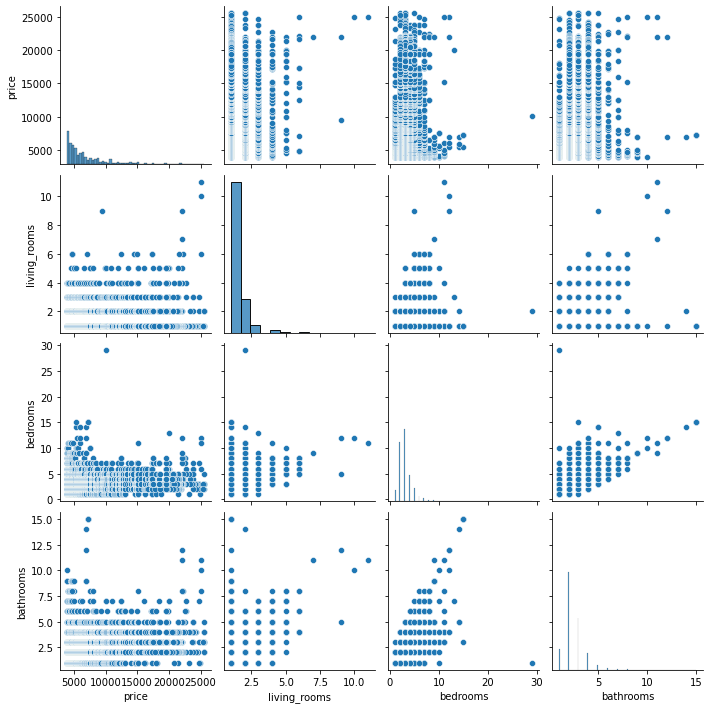

In [12]:
sns.pairplot(data)

property_type

In [13]:
print(data['property_type'].unique())

['flat' 'land' 'terraced house' 'triplex' 'detached house' 'property'
 'town house' 'duplex' 'semi-detached house' 'maisonette' 'cottage'
 'mews house' 'end terrace house' 'penthouse' 'shared accommodation'
 'farmhouse' 'barn conversion' 'bungalow' 'room' 'semi-detached bungalow'
 'country house' 'parking/garage' 'houseboat' 'detached bungalow']


In [14]:
print(data['property_type'].value_counts())

flat                      5761
property                   436
terraced house             410
detached house             383
town house                 175
semi-detached house        151
duplex                     126
maisonette                  85
mews house                  79
end terrace house           62
triplex                     36
shared accommodation        17
cottage                     16
penthouse                   15
barn conversion              6
bungalow                     3
houseboat                    2
room                         2
farmhouse                    2
country house                2
semi-detached bungalow       2
detached bungalow            1
parking/garage               1
land                         1
Name: property_type, dtype: int64


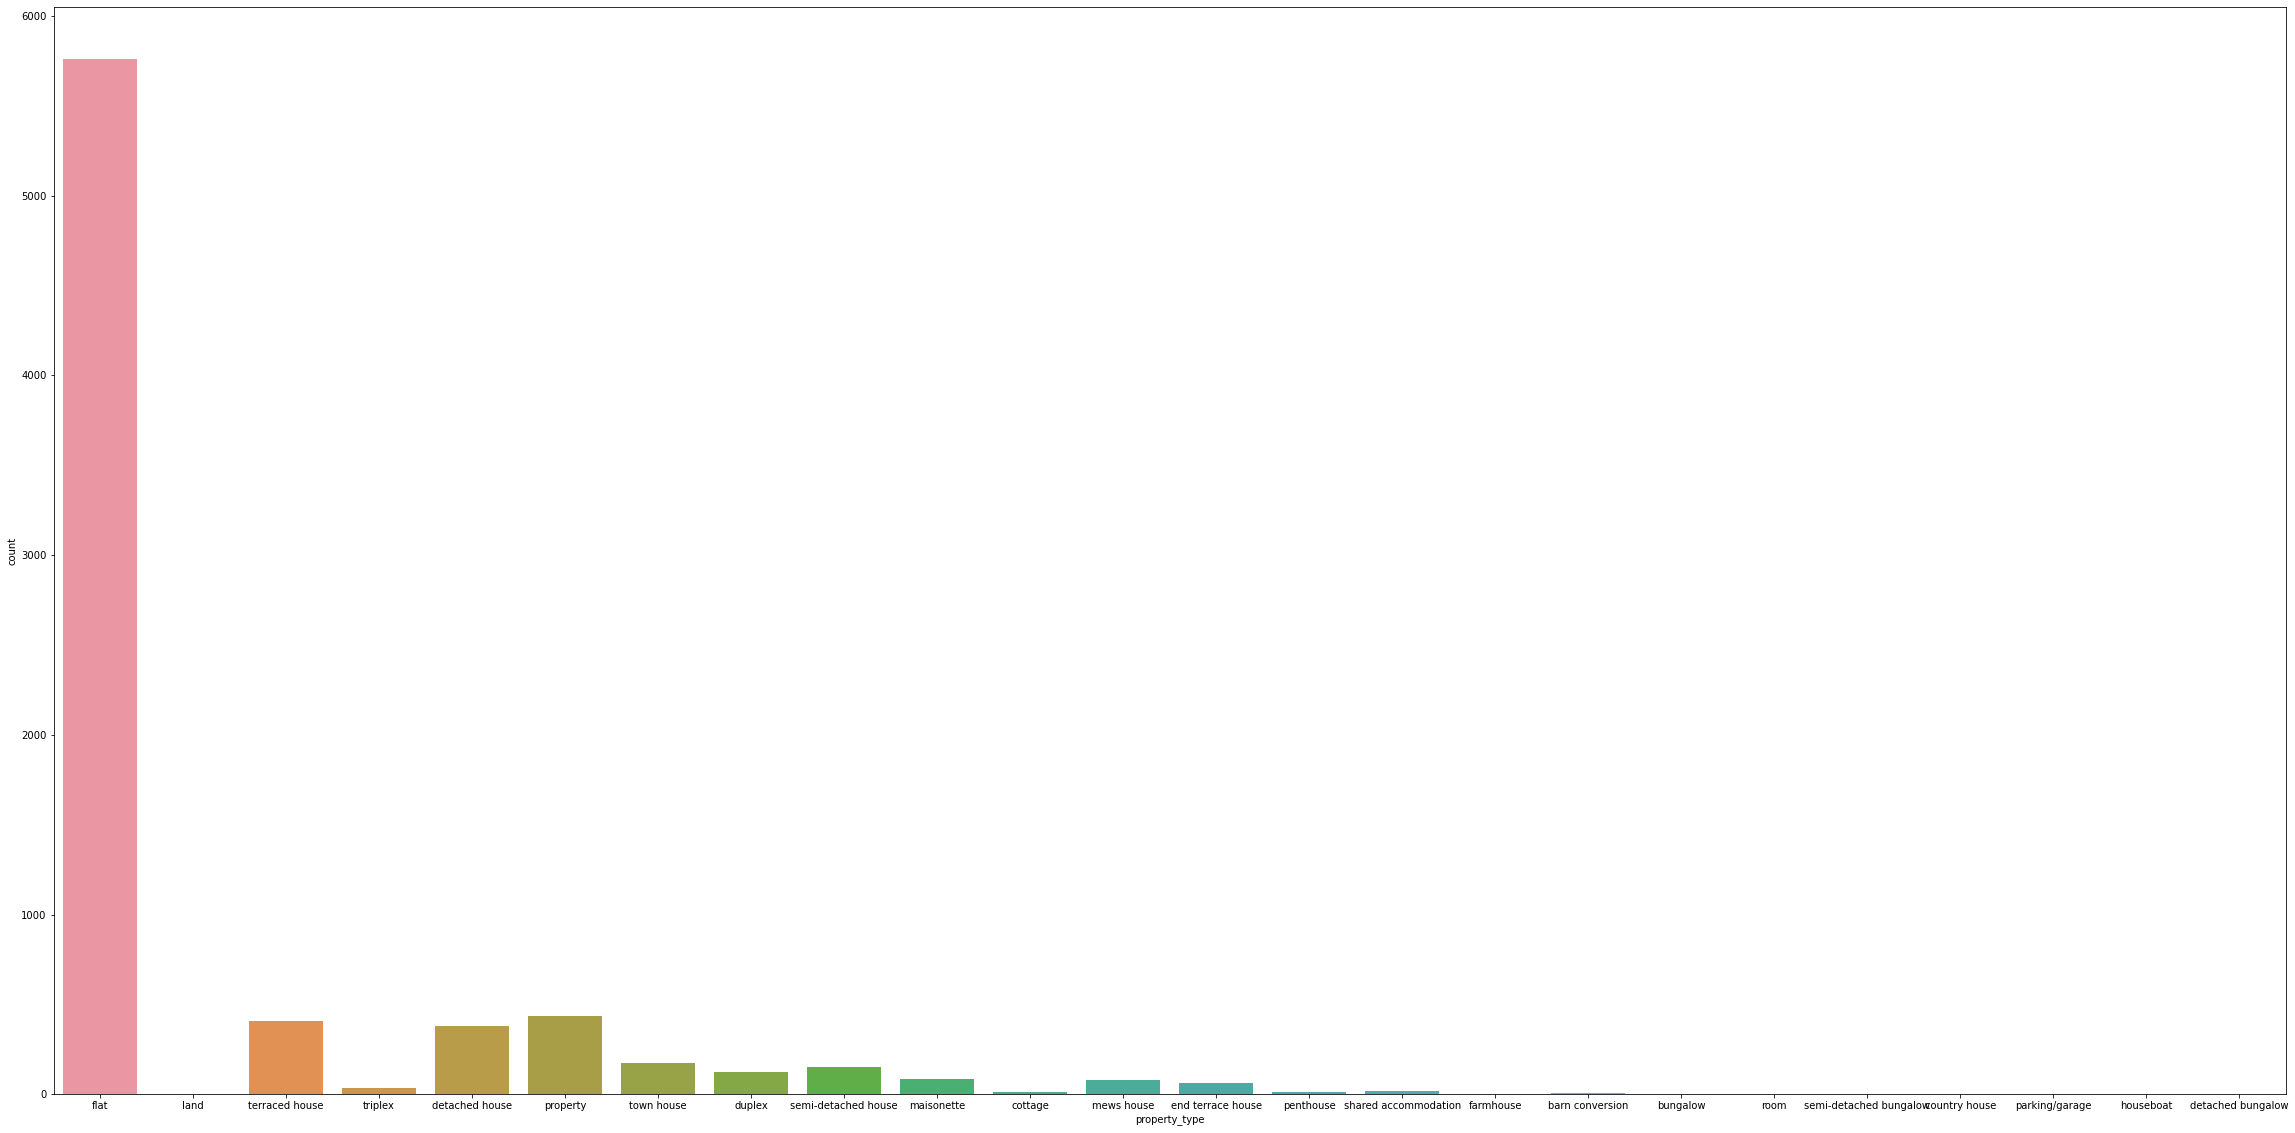

In [15]:
plt.figure(figsize=(40,20))
sns.countplot(x='property_type', data=data)
plt.show()

Text(0, 0.5, 'Price (£)')

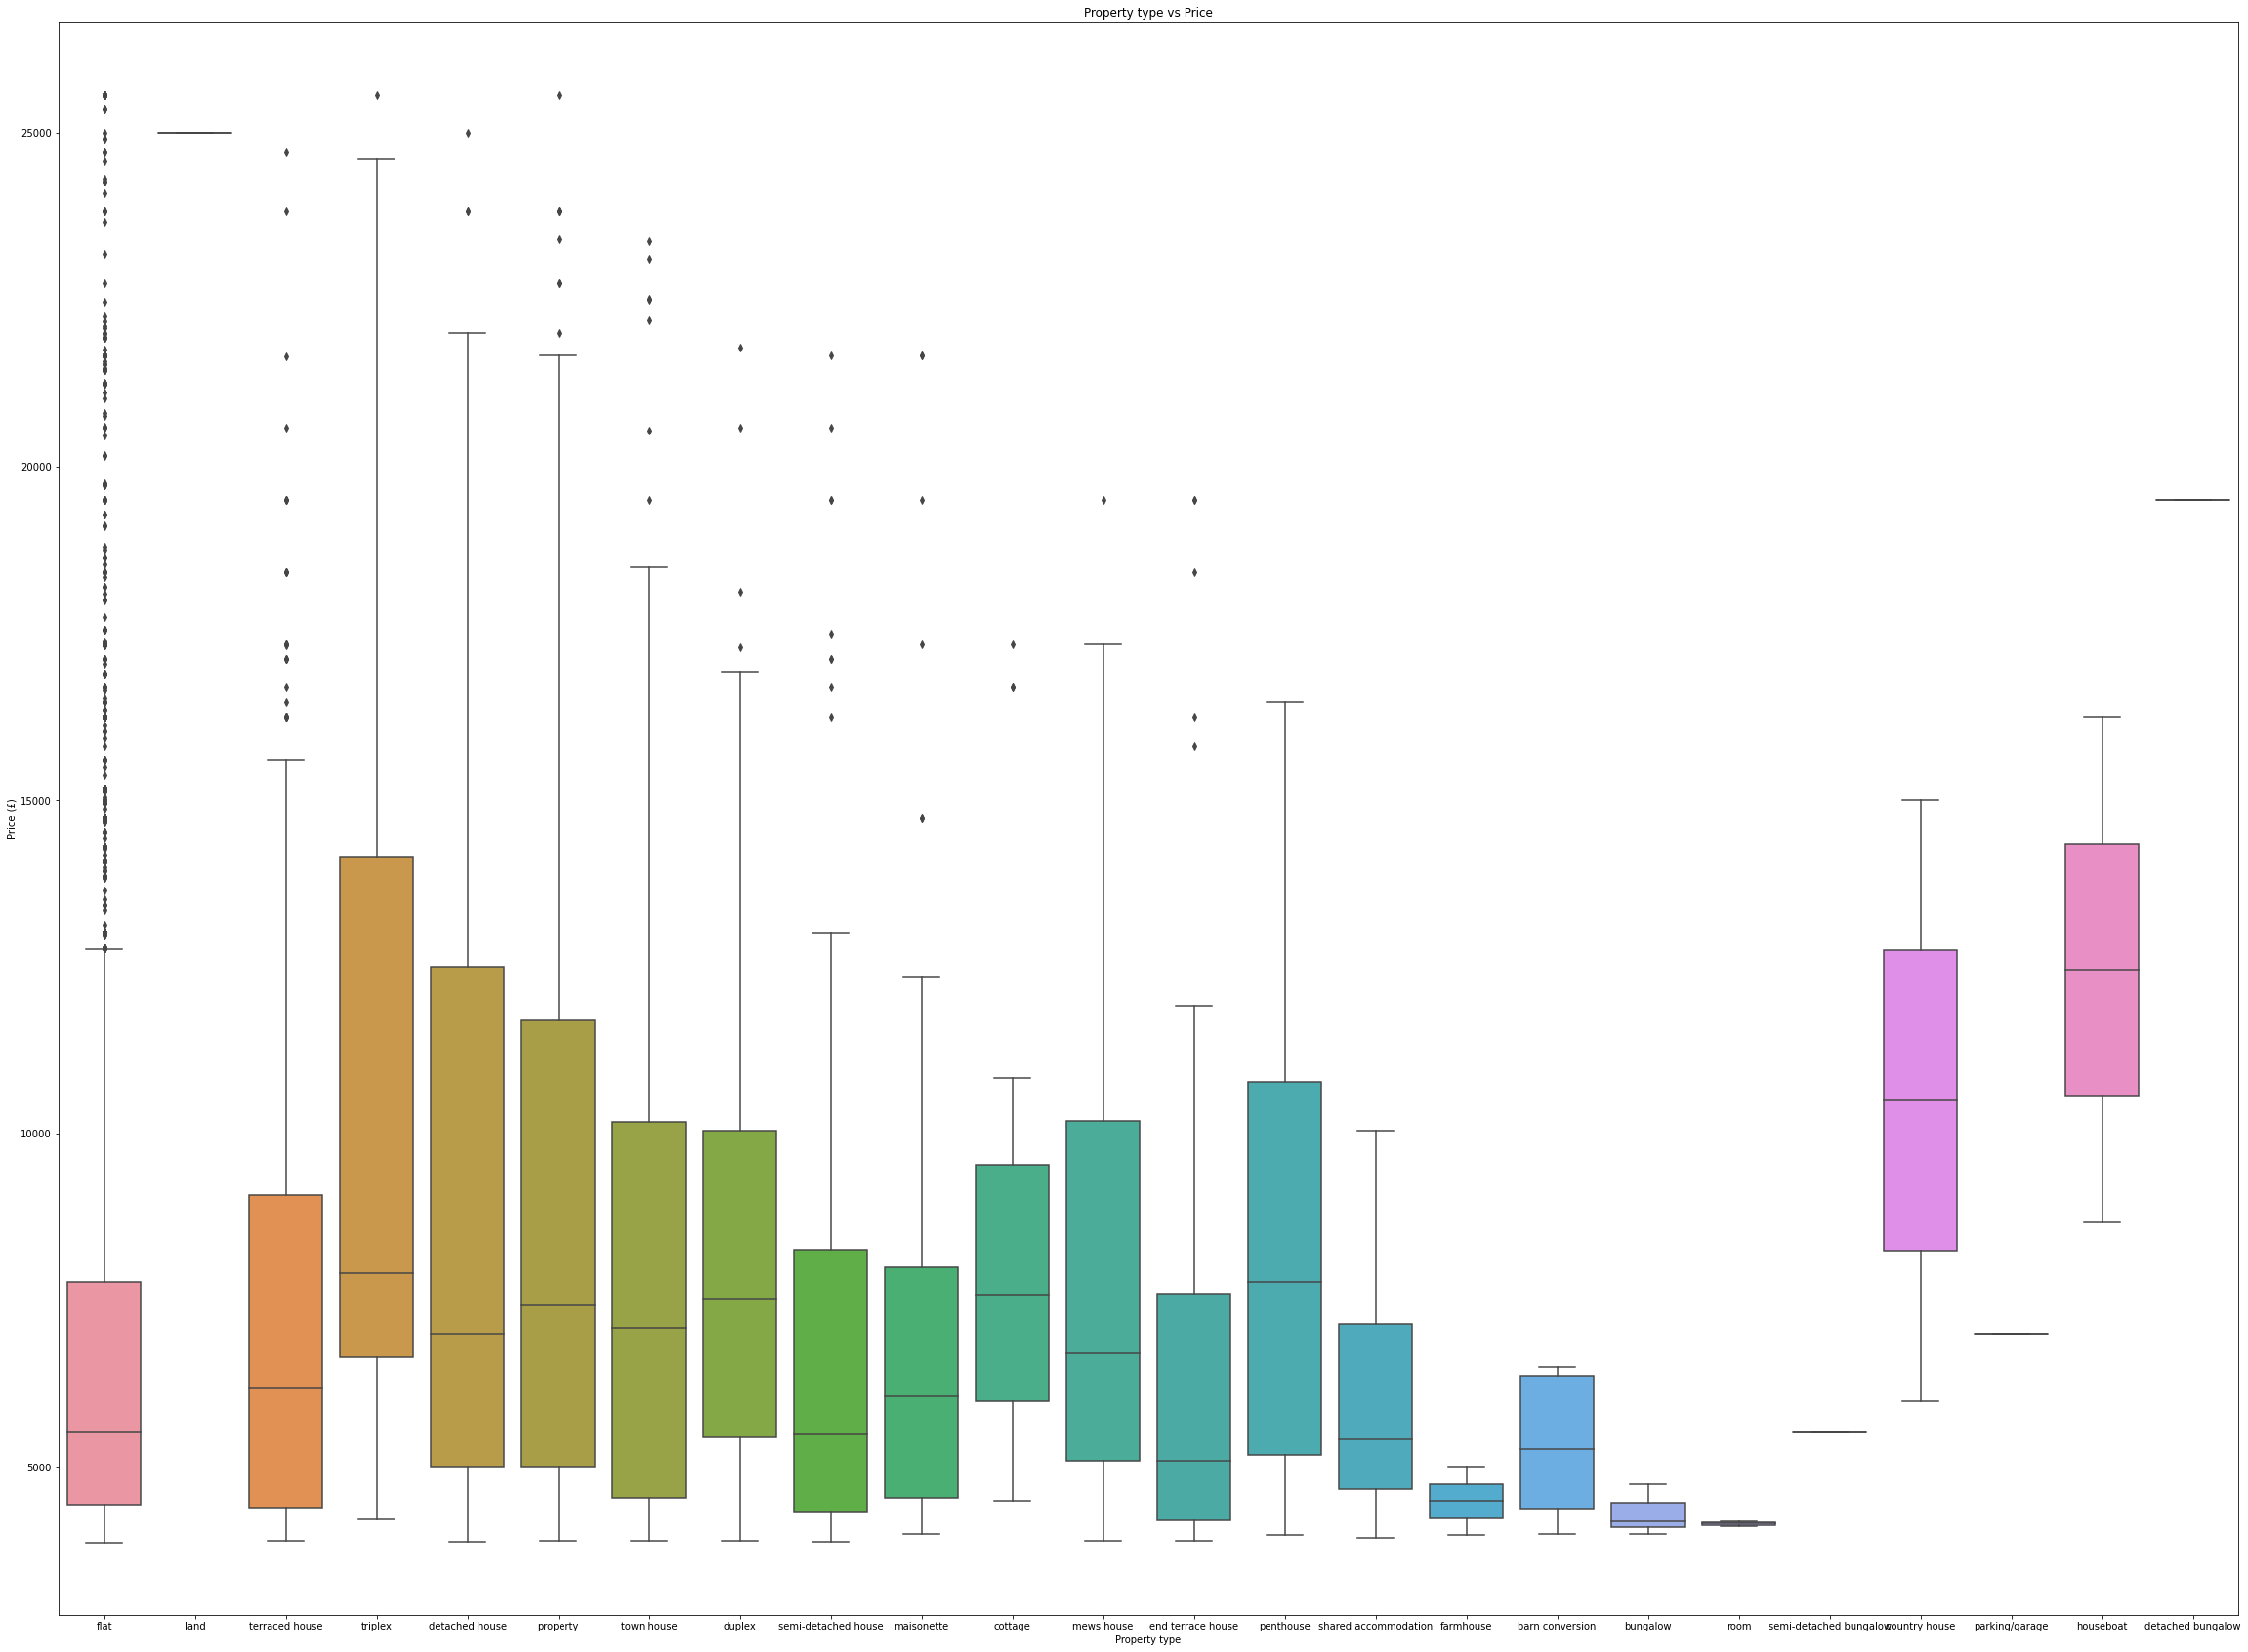

In [16]:
plt.figure(figsize=(40,30))
sns.boxplot(x='property_type', y='price', data=data).set_title('Property type vs Price')
plt.xlabel('Property type')
plt.ylabel('Price (£)')

outward_code

In [17]:
print('number of unique outward codes: {}'.format(data['outward_code'].nunique()))
print()
print(data['outward_code'].unique())

number of unique outward codes: 300

['W1K' 'NN29' 'W1D' 'W1J' 'W2' 'SW7' 'SW1A' 'SW6' 'W14' 'SW3' 'SW5' 'W1U'
 'SW1X' 'RM4' 'W8' 'NW8' 'W1T' 'SW17' 'SW16' 'SE25' 'NW7' 'TW9' 'RG10'
 'M3' 'NW3' 'SW1W' 'SW1E' 'NW1' 'N2' 'WC2E' 'SW19' 'TA7' 'KT16' 'W9' 'W11'
 'W1F' 'SE1' 'W1H' 'NW11' 'SW1P' 'W1W' 'WC2R' 'W1G' 'SE15' 'WC1H' 'E5'
 'SW10' 'SW1Y' 'SW15' 'CT13' 'EC1R' 'E14' 'W10' 'SW1V' 'N4' 'BS8' 'W1B'
 'EC4A' 'WC2A' 'NW4' 'EC4M' 'EC1V' 'BN3' 'TW10' 'CV4' 'WC1A' 'SL5' 'OX2'
 'RG9' 'E20' 'W5' 'SL2' 'NW10' 'BN2' 'OX3' 'OX1' 'SW9' 'TN12' 'CM22' 'TN6'
 'SO22' 'W6' 'WC1R' 'SW11' 'GU15' 'KT2' 'SL4' 'GU2' 'CM4' 'WC1B' 'SW4'
 'E1' 'TW1' 'SE22' 'N1' 'NW6' 'N19' 'SE13' 'OX4' 'LS3' 'EC3R' 'WC1N'
 'SW13' 'TW11' 'EC2A' 'PL4' 'N1C' 'WC1E' 'E1W' nan 'E3' 'SW8' 'N3' 'N10'
 'NG2' 'S2' 'OX16' 'W13' 'HA2' 'B29' 'SG13' 'HA8' 'GU19' 'CH4' 'L25' 'W4'
 'GU51' 'KT14' 'CV1' 'WA14' 'KT6' 'CB2' 'W1S' 'NG9' 'EC2Y' 'B7' 'GU1'
 'LE11' 'WC2N' 'M4' 'TW20' 'TW18' 'GU34' 'ME17' 'GL52' 'AL9' 'RG1' 'W3'
 'AL3' 'HA6' 'SE3' 'RG7

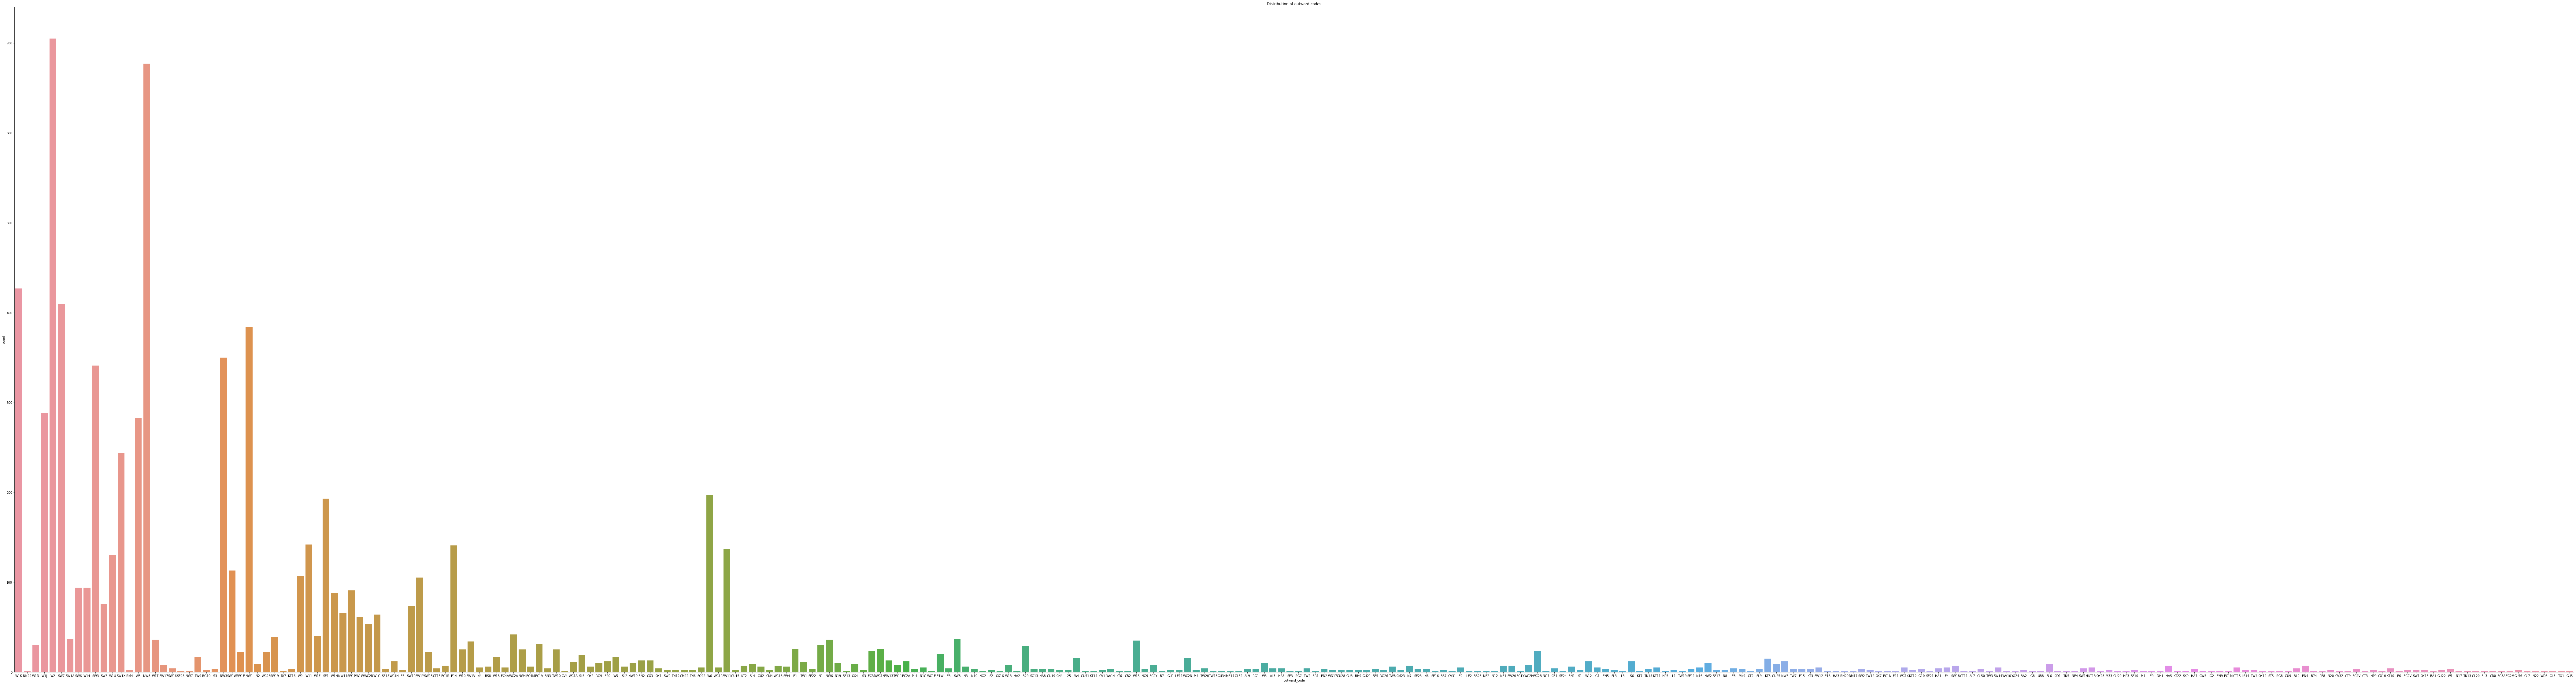

In [18]:
#double click to view
plt.figure(figsize=(150,40))
sns.countplot(x='outward_code', data=data).set_title('Distribution of outward codes')
plt.show()

price

Text(0.5, 0, 'Price (£)')

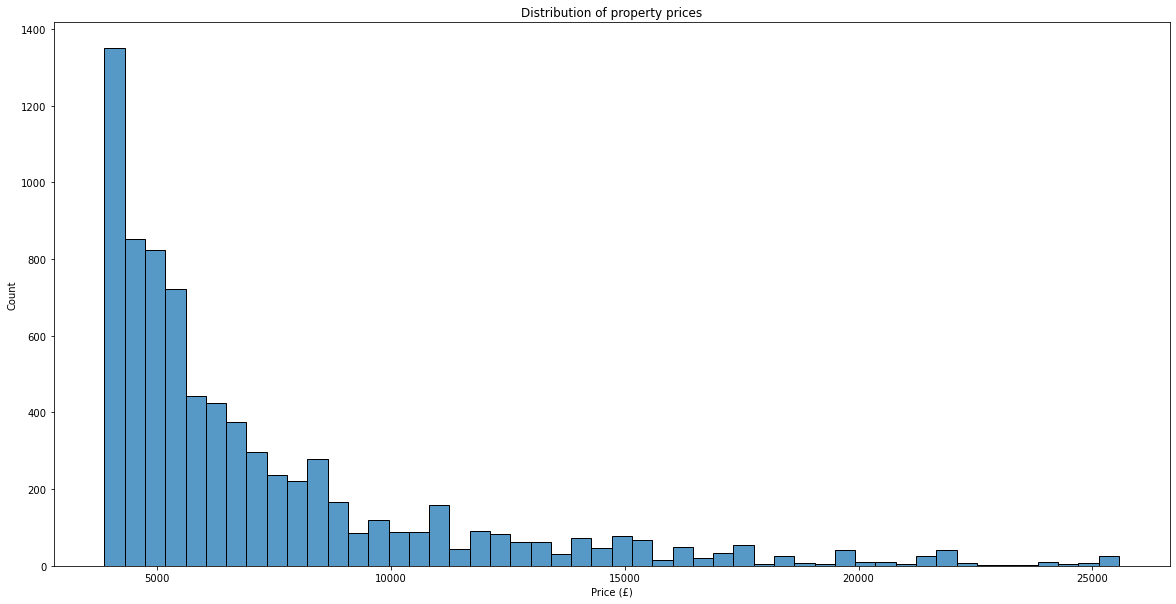

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(x='price', bins=50, data=data).set_title('Distribution of property prices')
plt.xlabel('Price (£)')

feature_importance
* create contingency tables for each pair of categorical features and perform a chi squared relationship test
* H0: features are independent, H1: features are dependent. p < 0.05, accept H1

In [20]:
#create contingency tables for each pair of categorical features and perform a chi squared relationship test
tags_property_type_table = pd.crosstab(data['tags'], data['property_type'], margins = False)
tags_property_type_table

property_type,barn conversion,bungalow,cottage,country house,detached bungalow,detached house,duplex,end terrace house,farmhouse,flat,...,parking/garage,penthouse,property,room,semi-detached bungalow,semi-detached house,shared accommodation,terraced house,town house,triplex
tags,,,,,,,,,,,,,,,,,,,,,
decorated,1,0,0,0,0,7,2,1,0,67,...,0,0,6,0,0,1,0,12,1,0
family,0,0,0,0,0,89,0,3,0,41,...,0,0,39,0,0,12,0,49,5,0
furnished,0,0,0,1,0,19,49,3,1,618,...,0,2,15,0,0,7,1,15,43,20
garage,0,0,0,0,0,7,0,0,1,4,...,0,0,3,0,0,1,0,4,0,0
garden,1,1,1,0,0,55,15,20,0,461,...,1,0,70,1,0,26,3,66,18,2
located,2,0,1,0,0,20,9,5,0,646,...,0,4,38,0,0,11,0,31,8,1
long let,0,0,0,0,0,5,0,1,0,86,...,0,0,13,0,0,3,0,0,0,0
modern,0,1,0,0,0,21,0,1,0,407,...,0,0,37,0,0,4,0,17,9,0
modernised,0,0,0,0,0,0,0,0,0,8,...,0,0,3,0,0,0,0,3,1,0


In [21]:
tags_property_type_table = pd.crosstab(data['tags'], data['property_type'], margins = False)
outward_code_tags_table = pd.crosstab(data['outward_code'], data['tags'], margins = False)
property_type_outward_code_table = pd.crosstab(data['property_type'], data['outward_code'], margins = False)

In [22]:
g0, p0, dof0, expctd0 = chi2_contingency(tags_property_type_table, lambda_="log-likelihood")
print(p0) #value is extremely low; evidence against a correlation

g1, p1, dof1, expctd1 = chi2_contingency(outward_code_tags_table, lambda_="log-likelihood")
print(p1) 

g2, p2, dof2, expctd2 = chi2_contingency(property_type_outward_code_table, lambda_="log-likelihood")
print(p2)

g2, p2, dof2, expctd2 = chi2_contingency(property_type_outward_code_table, lambda_="log-likelihood")
print(p2)

5.7640673562795064e-142
5.920528067385346e-11
1.0
1.0


tags and property_type: reject H0, that features are independent

outward_code and tags: reject H0, that features are independent

property_type and outward_code: accept H0, that features are independent

Only one H0 case; not enough evidence to remove any feature.

Text(0, 0.5, 'Price (£)')

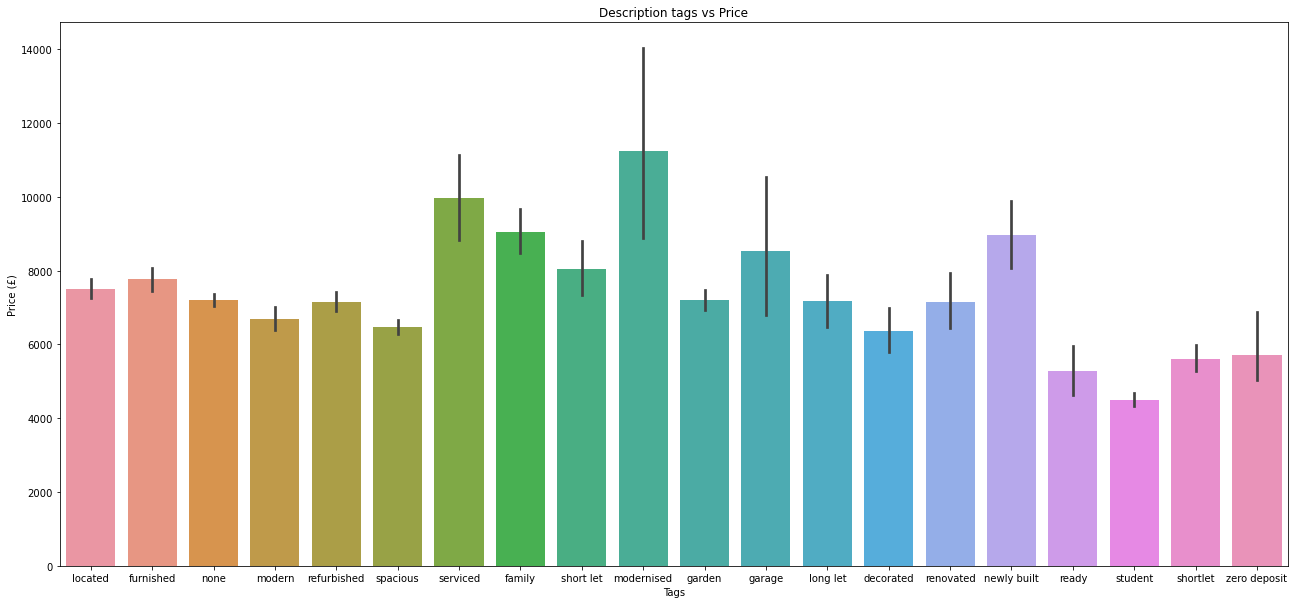

In [23]:
plt.figure(figsize=(22,10))
sns.barplot(x='tags', y='price', data=data).set_title('Description tags vs Price')
plt.xlabel('Tags')
plt.ylabel('Price (£)')

Text(0.5, 0, '# bathrooms')

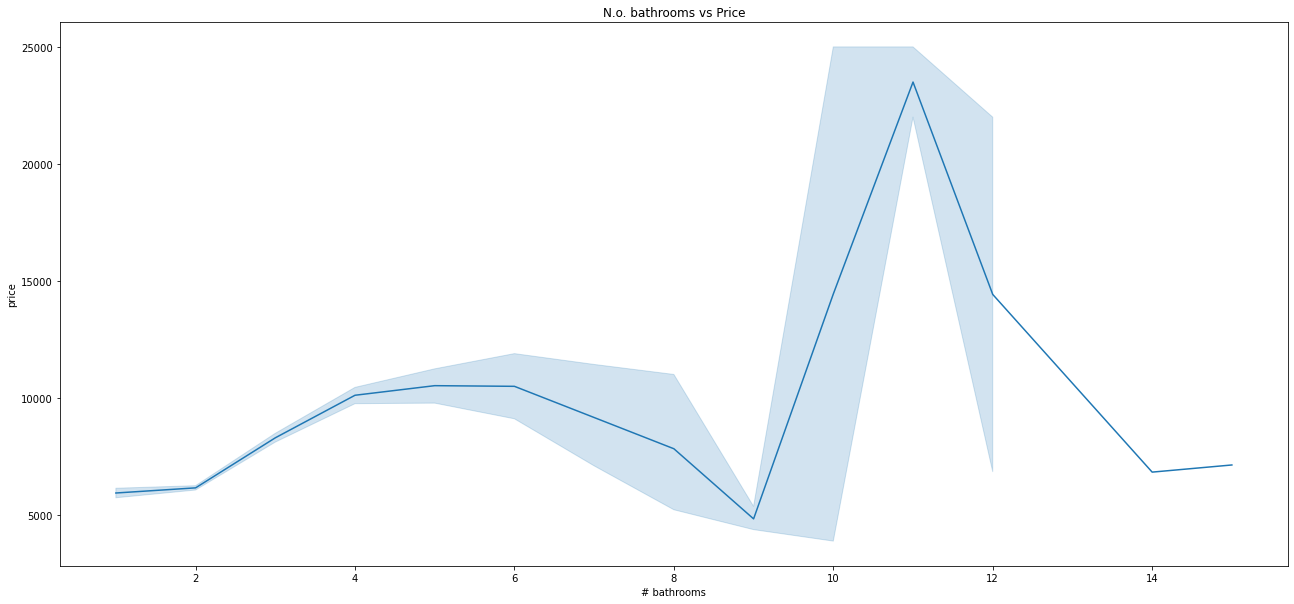

In [24]:
plt.figure(figsize=(22,10))
sns.lineplot(x='bathrooms', y='price', data=data).set_title('N.o. bathrooms vs Price')
plt.xlabel('# bathrooms')

Text(0.5, 0, '# living rooms')

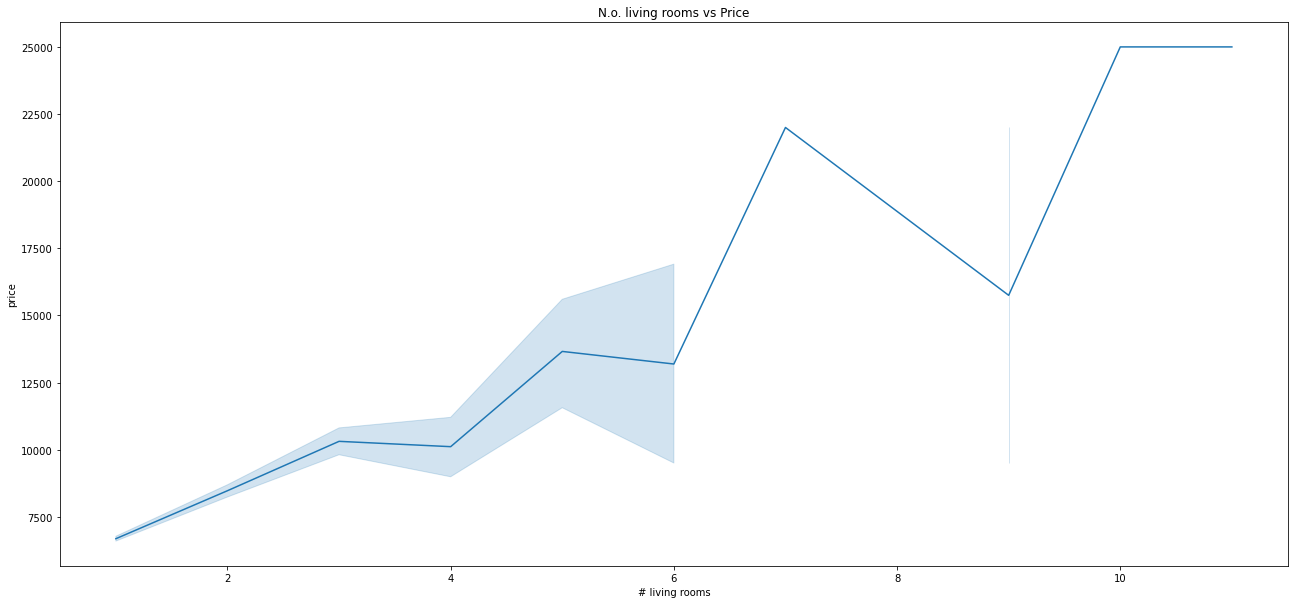

In [25]:
plt.figure(figsize=(22,10))
sns.lineplot(x='living_rooms', y='price', data=data).set_title('N.o. living rooms vs Price')
plt.xlabel('# living rooms')

Text(0.5, 0, '# bedrooms')

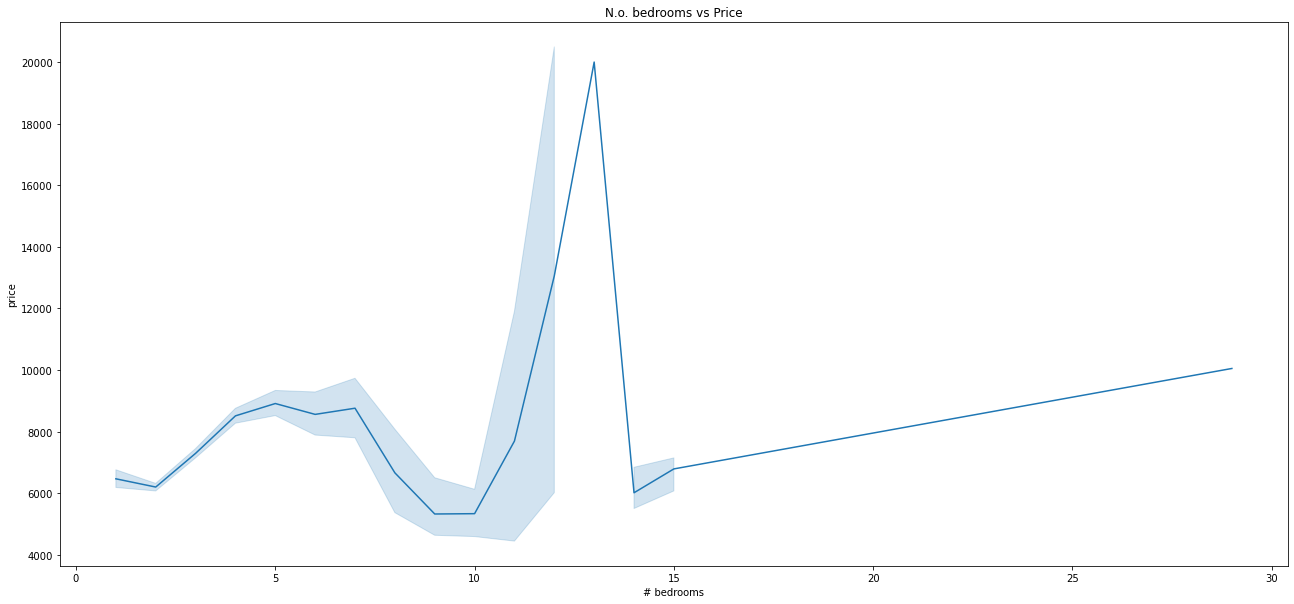

In [26]:
plt.figure(figsize=(22,10))
sns.lineplot(x='bedrooms', y='price', data=data).set_title('N.o. bedrooms vs Price')
plt.xlabel('# bedrooms')

town_city

In [27]:
data['town_city'].unique()

array(['London', 'Bedfordshire', 'Romford', 'Richmond', 'Berkshire',
       'Manchester', 'Reading', 'North', 'Surrey KT16', 'Sandwich',
       'Bristol BS8', 'East', 'Richmond TW10', 'Coventry', 'Oxford OX2',
       'Henley-On-Thames', 'Buckinghamshire', 'Brighton', 'Oxford',
       'Tonbridge TN12', "Bishop's Stortford", 'Crowborough', 'Kent TN12',
       'Winchester', 'Surrey', 'Kingston', 'Guildfod', 'Essex',
       'Twickenham', 'Oxford OX4', 'Leeds', 'Teddington', 'Guildford',
       'Plymouth', 'Isle', 'HMO', 'Nottingham', 'Sheffield',
       'Oxfordshire', 'Guildford GU2', 'Brighton BN2', 'Harrow',
       'Birmingham', 'Hertford', 'Middlesex', 'Chester', 'Merseyside',
       'Fleet', 'West', 'Hove', 'Altrincham', 'Surbiton KT6',
       'Richmond TW9', 'Cambridge', 'Bagshot', 'Beeston',
       'Loughborough LE11', 'Manchester M4', 'Selly', 'Chertsey', 'Egham',
       'Englefield', 'Staines Upon', 'Hampshire', 'Kent', 'Edgware',
       'Gloucestershire', 'Windsor', 'Hatfield', 'S

In [28]:
#proportion of non London locations
sum(data['town_city'].value_counts()[1:-1])/data['town_city'].value_counts()[0]

0.07689110556940981

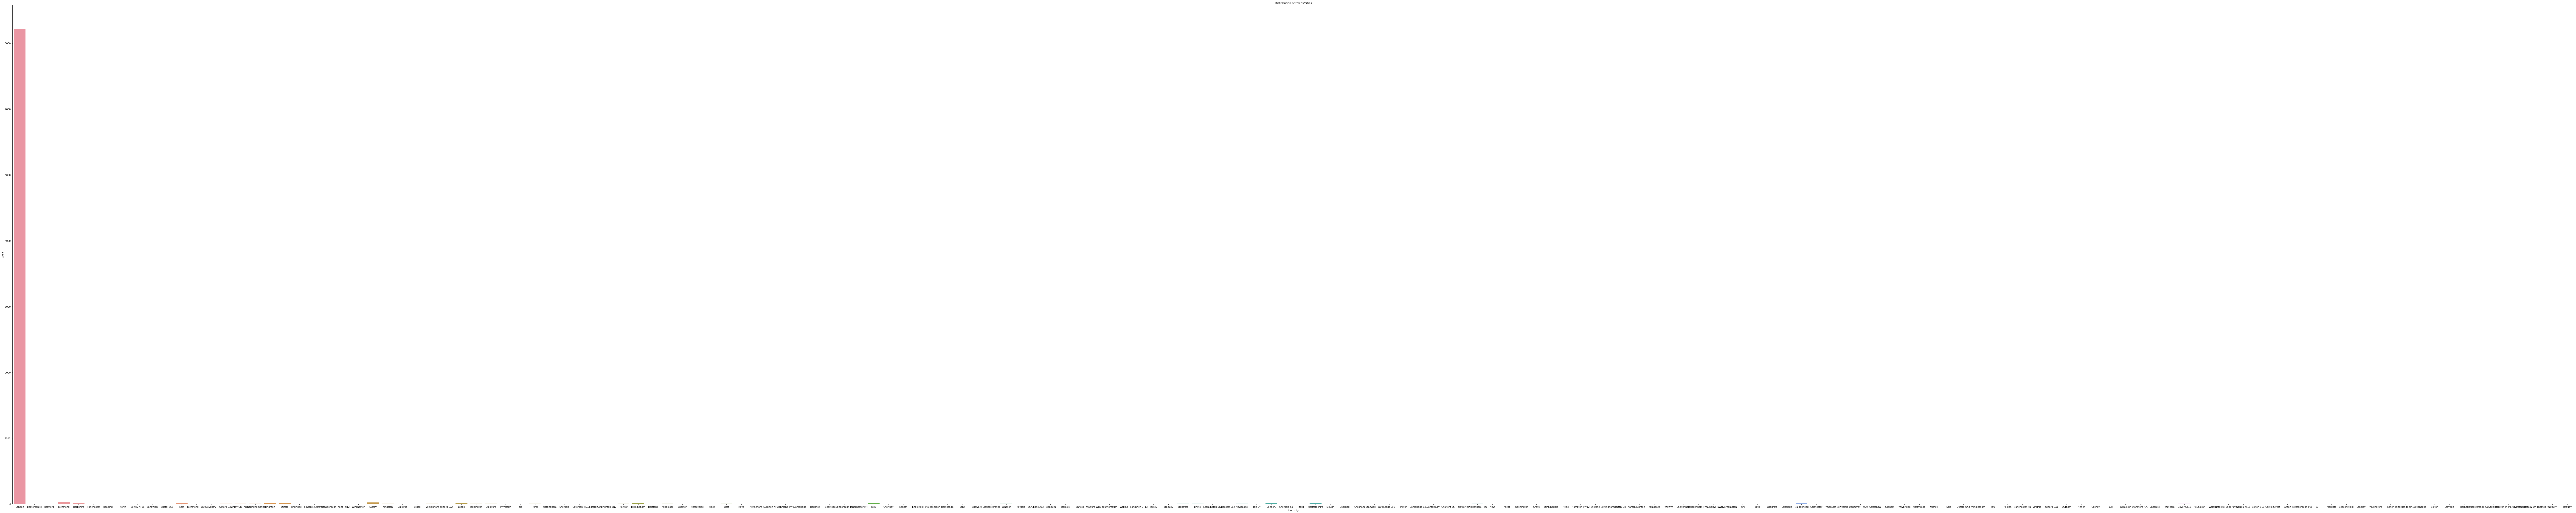

In [29]:
#double-click to view
plt.figure(figsize=(200,40))
sns.countplot(x='town_city', data=data).set_title('Distribution of towns/cities')
plt.show()

In [30]:
#vast majority of properties located in London, drop this feature